In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data\stud.csv")

In [4]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
# 1) check missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [7]:
for c in df.columns:
    print(f"{c}: {df[c].unique()}\n")

gender: ['female' 'male']

race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']

parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch: ['standard' 'free/reduced']

test_preparation_course: ['none' 'completed']

math_score: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]

reading_score: [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]

writing_score: [ 74  88  93  

In [8]:
df.shape

(1000, 8)

In [9]:
#2) Check duplicates
df.duplicated().sum()

0

In [10]:
###) 
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [11]:
#3) Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
# 4) Number of unique value in each column
for c in df.columns[:-3]:
    print(f"{c}: {df[c].unique()}: {len(df[c].unique())}\n")

gender: ['female' 'male']: 2

race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']: 5

parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']: 6

lunch: ['standard' 'free/reduced']: 2

test_preparation_course: ['none' 'completed']: 2



In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
# 5) Seprate out numerical and categorical column
# Numerical column
num_features = [f for f in df.columns if df[f].dtype != object ]

# Categorical Features
cat_features = [f for f in df.columns if df[f].dtype == object ]

In [15]:
print(f"we have {len(num_features)} numerical features: {num_features}")
print(f"we have {len(cat_features)} categorical features: {cat_features}")

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [16]:
# 6) Adding column for 'Total Score' and 'Average'
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3

In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
# 7) total students with highest score in each of the subject

# method 1
# print(df[df['math_score'] == 100].shape[0])
# print(df[df['reading_score'] == 100].shape[0])
# print(df[df['writing_score'] == 100].shape[0])

# method 2
print(f"Number of student with full marks in Maths: {df[df['math_score'] == 100]['math_score'].count()}")
print(f"Number of student with full marks in Reading: {df[df['reading_score'] == 100]['reading_score'].count()}")
print(f"Number of student with full marks in Writing: {df[df['writing_score'] == 100]['writing_score'].count()}")

Number of student with full marks in Maths: 7
Number of student with full marks in Reading: 17
Number of student with full marks in Writing: 14


In [19]:
# 7.1)
print(f"Number of student with full marks in Maths: {df[df['math_score'] < 20]['math_score'].count()}")
print(f"Number of student with full marks in Reading: {df[df['reading_score'] < 20]['reading_score'].count()}")
print(f"Number of student with full marks in Writing: {df[df['writing_score'] < 20]['writing_score'].count()}")

Number of student with full marks in Maths: 4
Number of student with full marks in Reading: 1
Number of student with full marks in Writing: 3


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

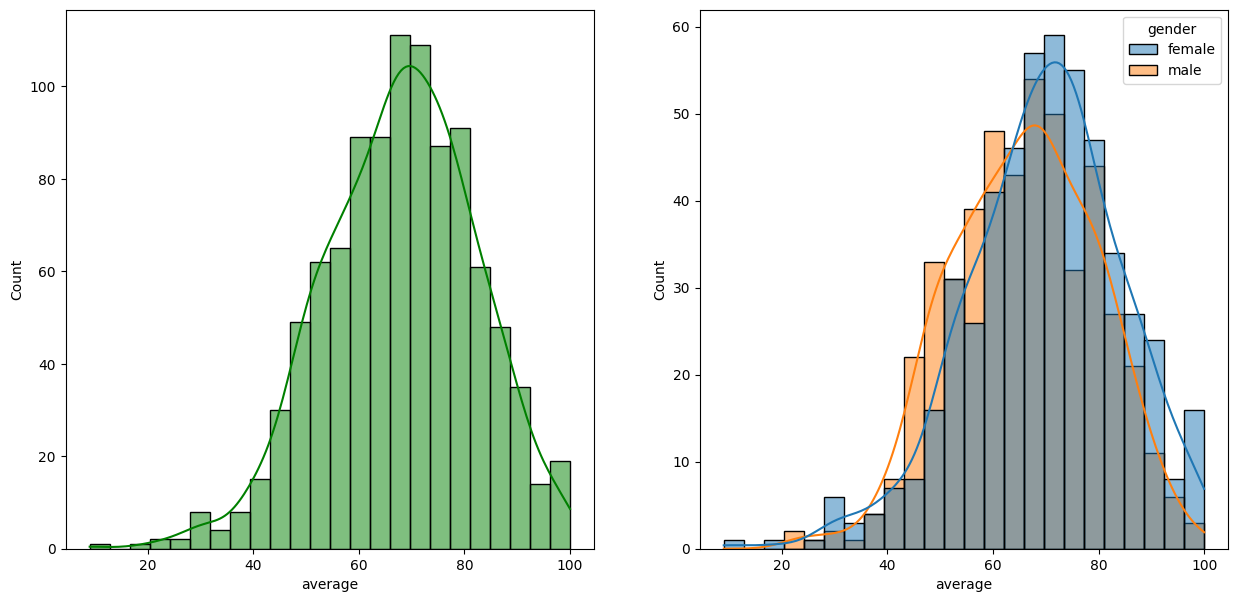

In [20]:
#1) hist plot for 'average' + 'gender'
plt.subplots(1, 2, figsize=(15, 7)) 
plt.subplot(121)
sns.histplot(data=df, x='average', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, color='g', hue='gender')
plt.show()


In [21]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='total_score', ylabel='Count'>

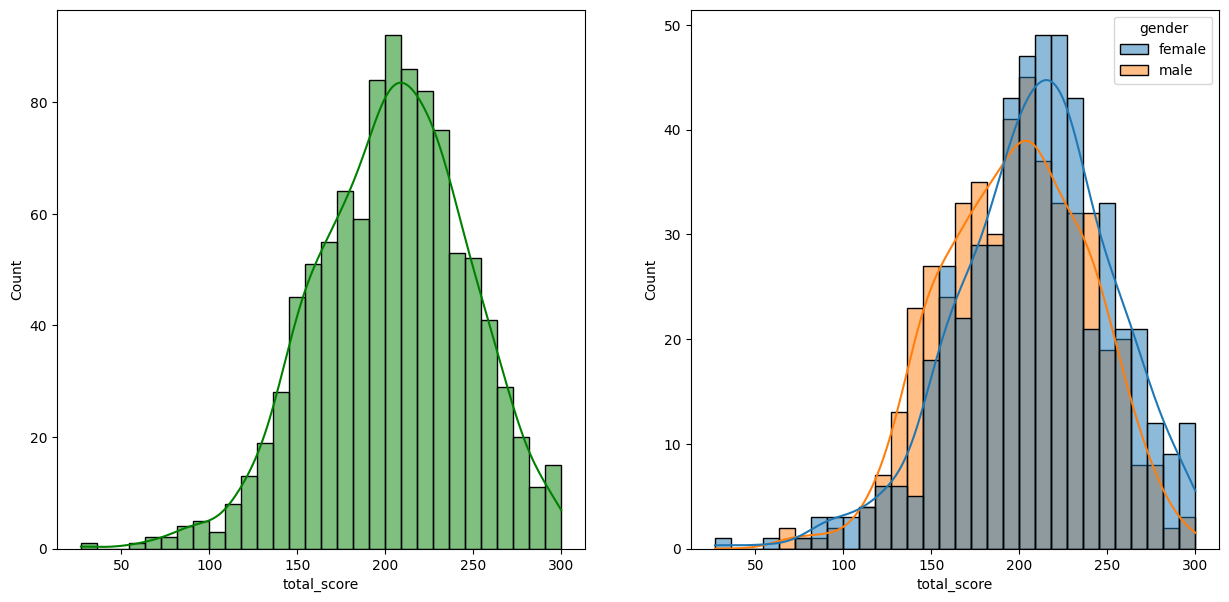

In [22]:
#2) hist plot for 'total_score' + 'gender'
plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', kde=True, bins=30, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, bins=30, hue='gender')

In [23]:
#3) hist plot for 'average' + lunch

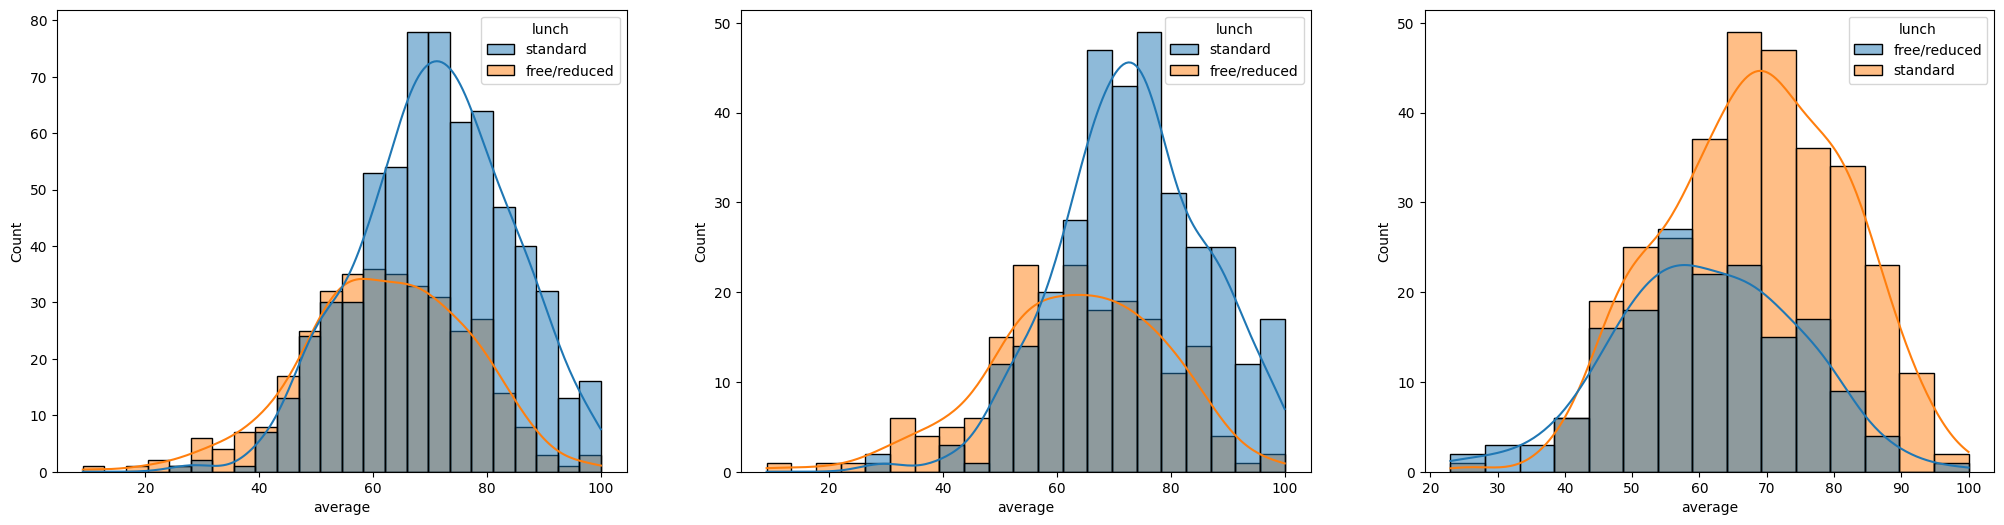

In [24]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')

plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='lunch')

plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='lunch')

plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

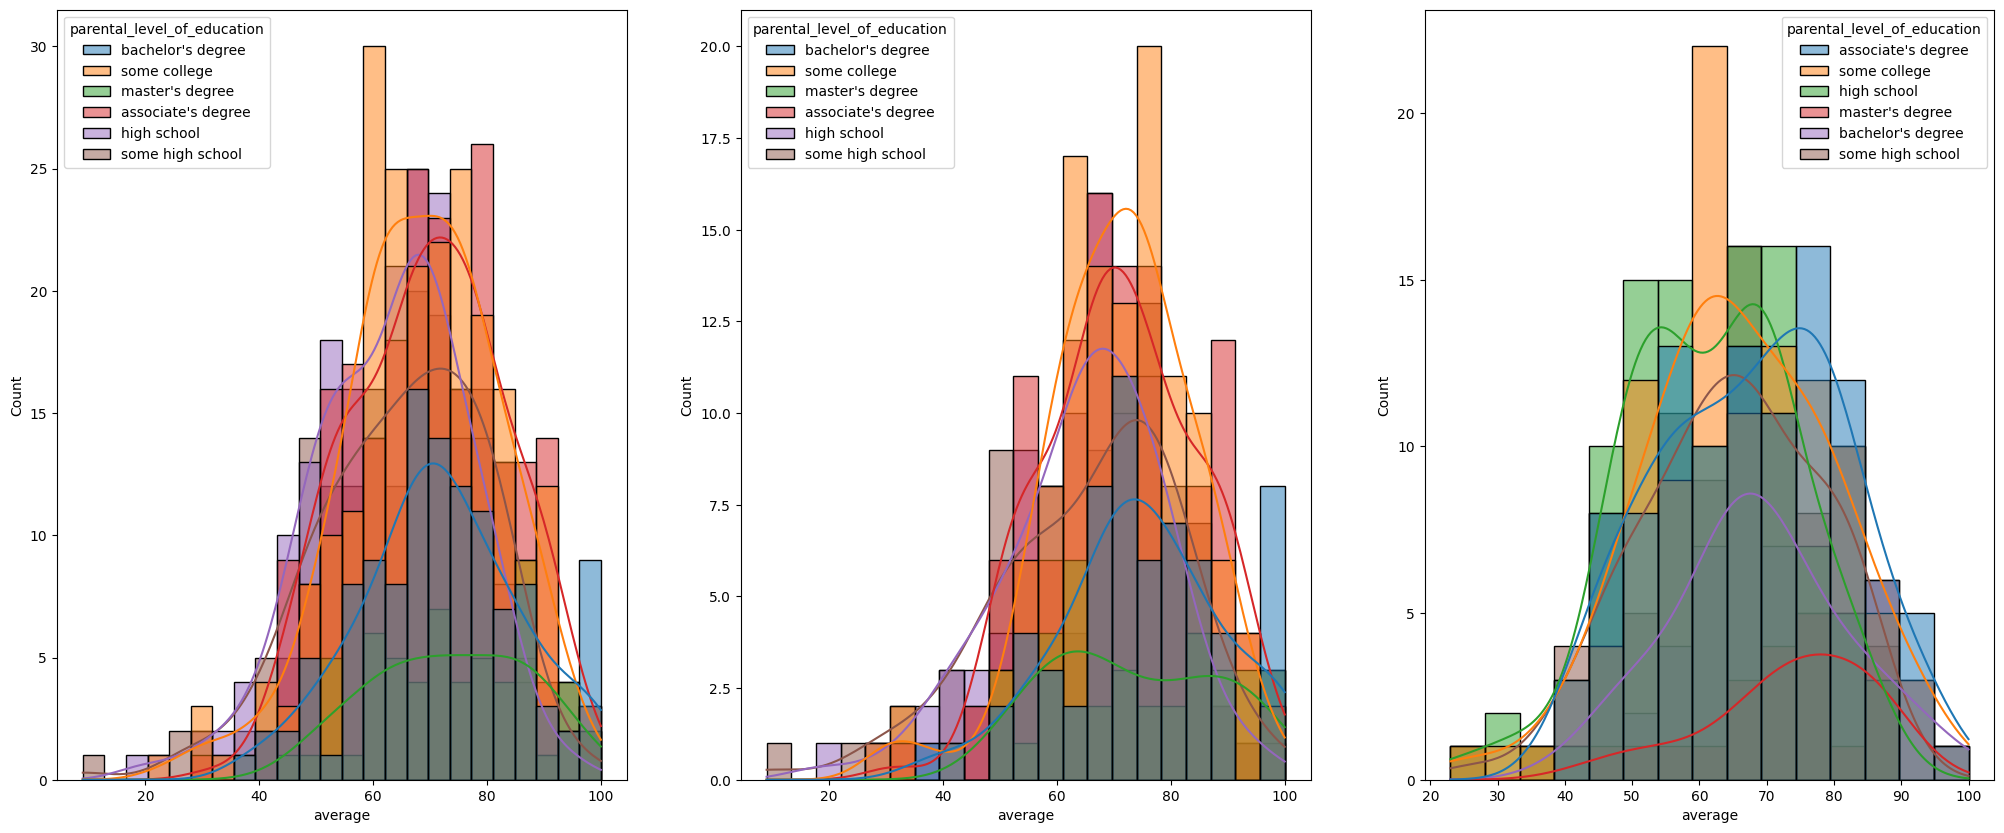

In [25]:
#4) hist plot for 'average' + parential_lvl_education
plt.subplots(1,3, figsize=(25, 10))

plt.subplot(131)
sns.histplot(data=df, x='average', hue='parental_level_of_education', kde=True)

plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x='average', hue='parental_level_of_education', kde=True)

plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'], x='average', hue='parental_level_of_education', kde=True)

plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

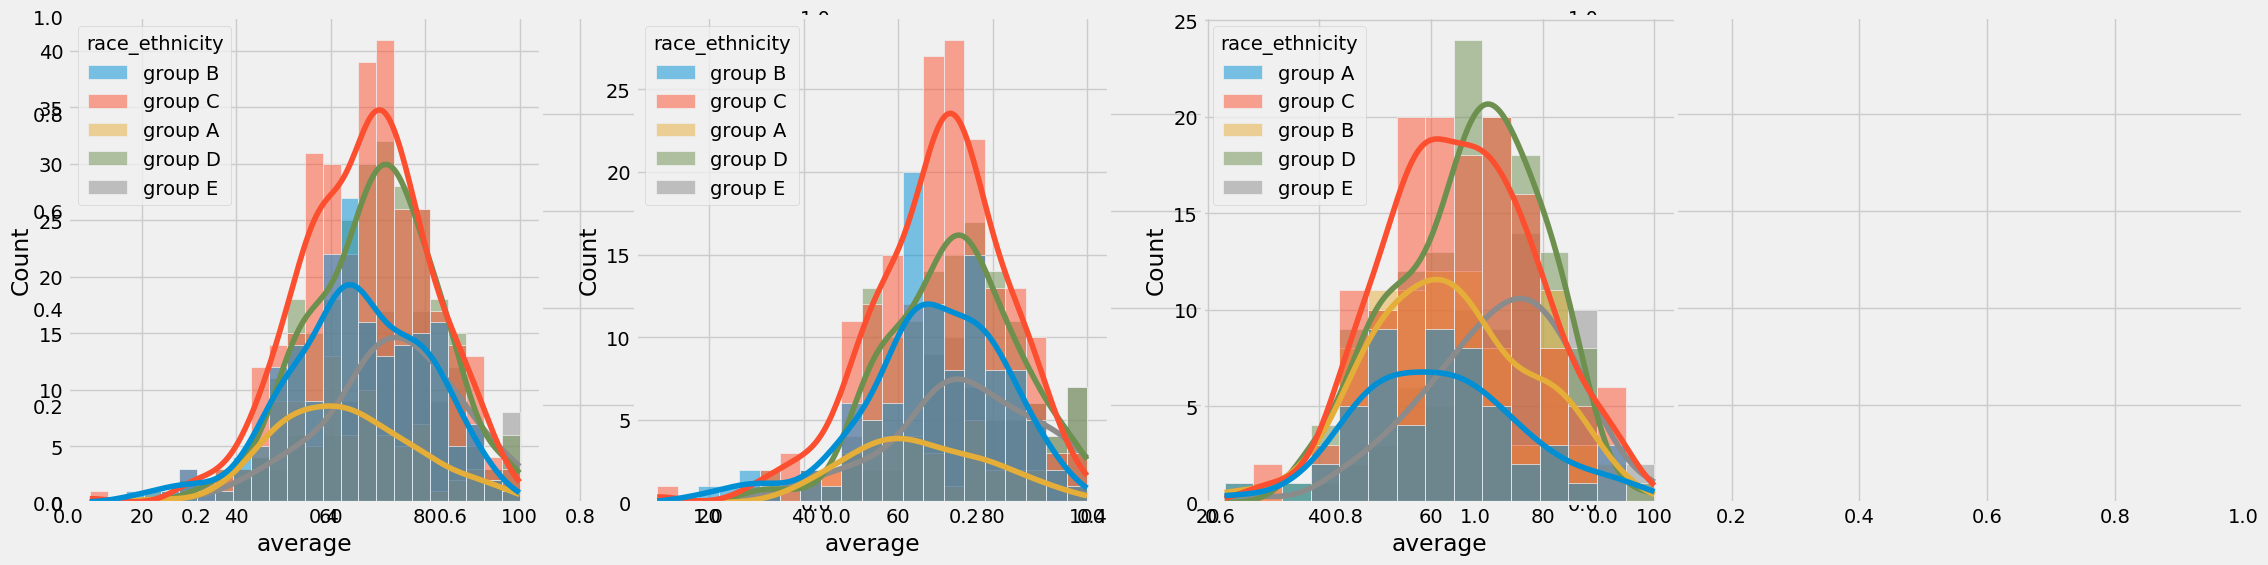

In [194]:
#4) hist plot for 'average' + race_ethnicity
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

# 4.2 Maximum Score of student in all three subjects

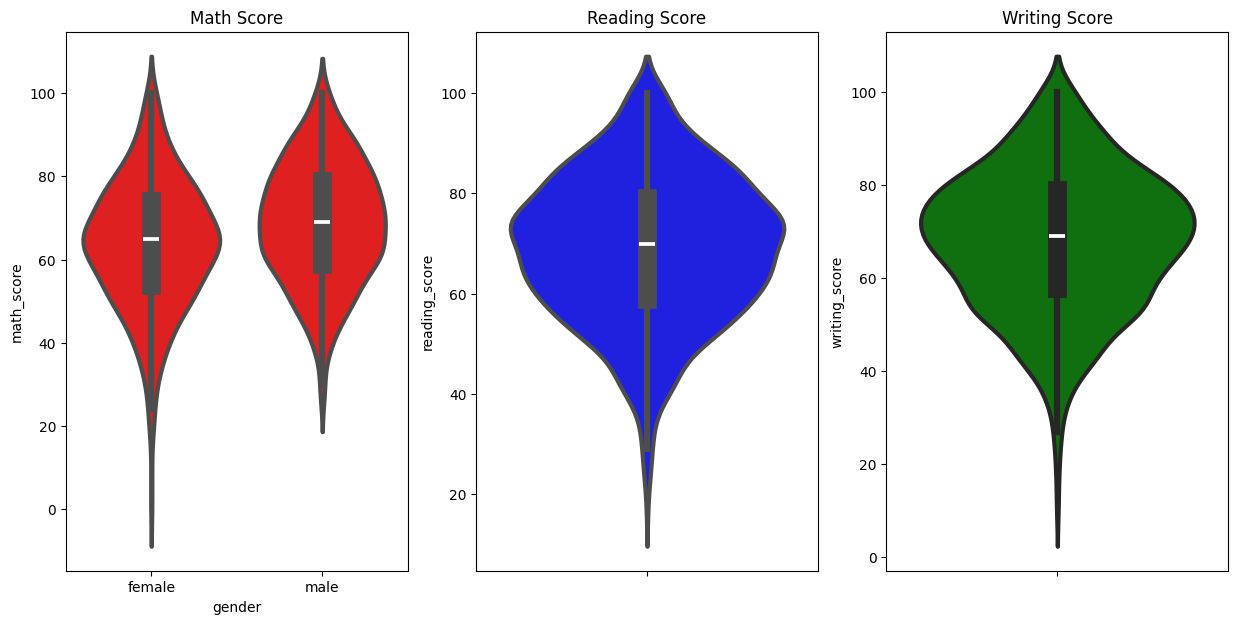

In [27]:
#1) violin plot
plt.subplots(1,3, figsize=(15,7))

plt.subplot(131)
plt.title('Math Score')
sns.violinplot(data=df, y='math_score', x= 'gender', color='r', linewidth=3)

plt.subplot(132)
plt.title('Reading Score')
sns.violinplot(data=df, y='reading_score', color='b', linewidth=3)

plt.subplot(133)
plt.title('Writing Score')
sns.violinplot(data=df, y='writing_score', color='g', linewidth=3)

plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

# 4.3 Univariate analysis using pieplot

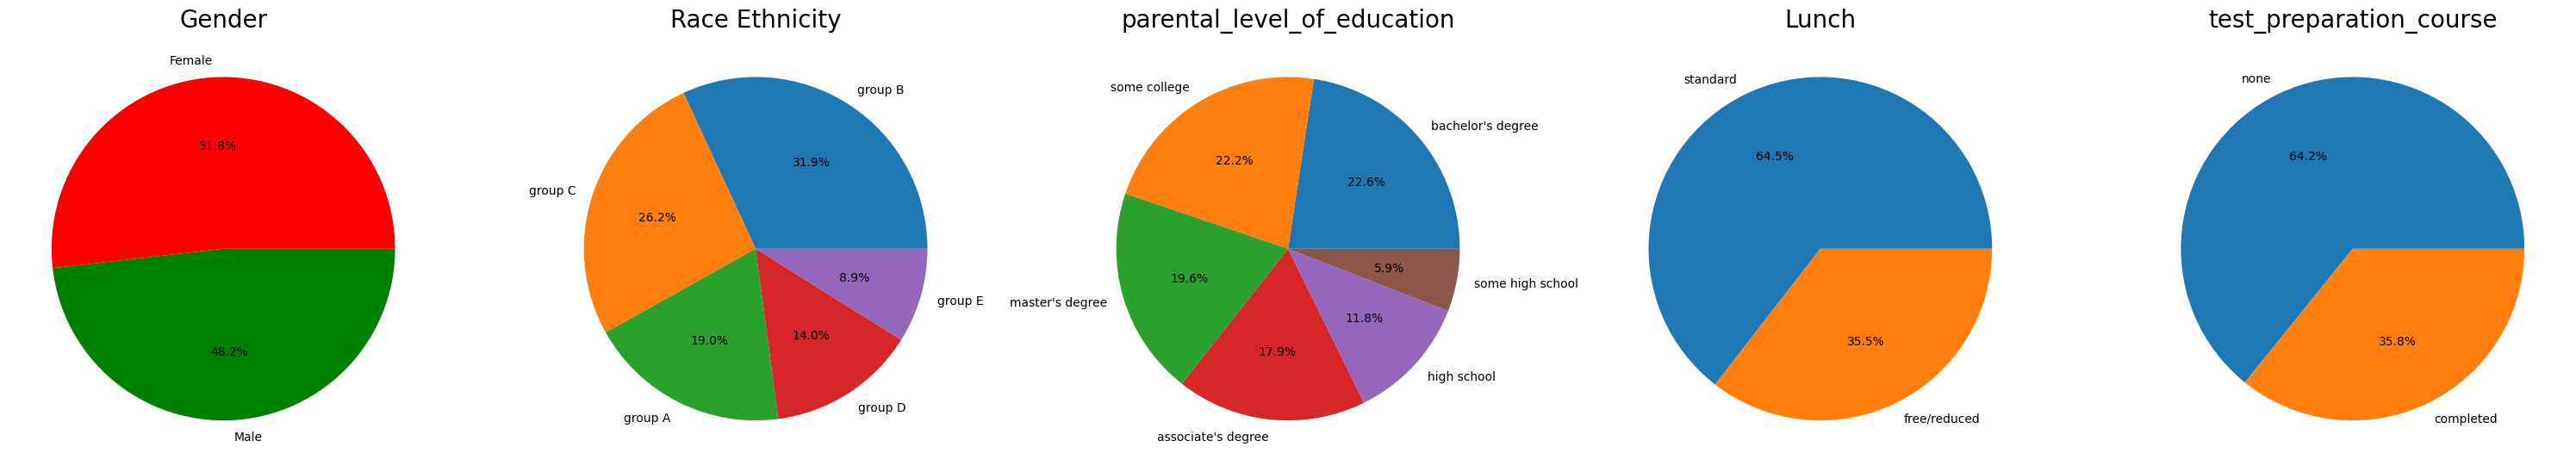

In [28]:
plt.subplots(1,5, figsize=(30,12))

#1) Pie chart for Gender
plt.subplot(151)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '%1.1f%%')
plt.title('Gender', fontsize = 20)

#2) Pie chart for race_ethnicity
plt.subplot(152)
size = df['race_ethnicity'].value_counts()
labels = df['race_ethnicity'].unique()

plt.pie(size, labels=labels, autopct = '%1.1f%%')
plt.title('Race Ethnicity', fontsize=20)

#3) parental_level_of_education
plt.subplot(153)
size = df['parental_level_of_education'].value_counts()
labels = df['parental_level_of_education'].unique()

plt.pie(size, labels=labels, autopct='%1.1f%%')
plt.title('parental_level_of_education', fontsize=20)

#4) Lunch
plt.subplot(154)
size = df['lunch'].value_counts()
labels = df['lunch'].unique()

plt.pie(size, labels=labels , autopct='%1.1f%%')
plt.title('Lunch', fontsize=20)

#5) test course
plt.subplot(155)
size = df['test_preparation_course'].value_counts()
labels = df['test_preparation_course'].unique()

plt.pie(size, labels=labels , autopct='%1.1f%%')
plt.title('test_preparation_course', fontsize=20)

plt.tight_layout() # automatically adjusts the padding and spacing between elements 
plt.grid()
plt.show()


#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

In [29]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# 4.4 Feature Wise Visualization

### 1) Gender Column ( UNIVARIATE ANALYSIS ) 
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

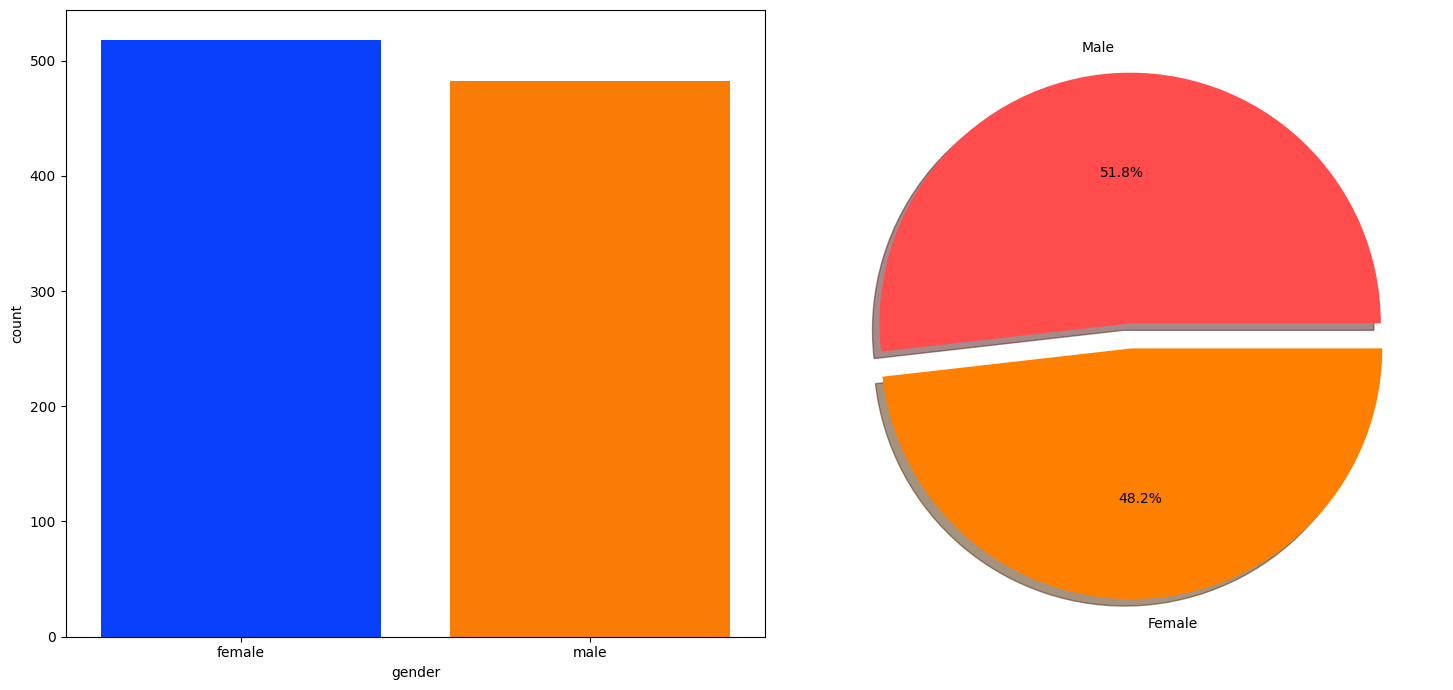

In [41]:
##### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )
plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)

#count plot( no labels)
sns.countplot(x=df['gender'],data=df,palette ='bright',saturation=0.95)
# for container in ax[0].containers:
#     ax[0].bar_label(container,color='black',size=20)

#pie plot
plt.subplot(122)
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])

plt.tight_layout()
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

### 2) Gender Column (BIVARIATE ANALYSIS) 
###### Is gender has any impact on student's performance ? 

In [43]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [88]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


In [ ]:
# Bar plot understanding
# male_scores_average = gender_group['average']['male']
# male_math_average = gender_group['math_score']['male']

# female_scores_average = gender_group['average']['female']
# female_math_average = gender_group['math_score']['female']

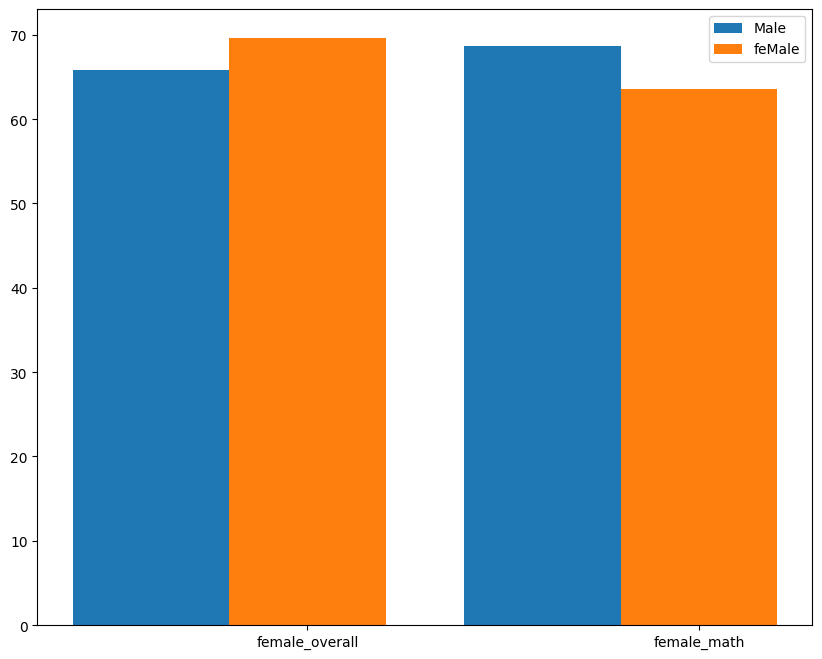

In [86]:
# plt.figure(figsize=(10,8))

# plt.bar(x = [0,1], height=[male_scores_average,male_math_average], width=0.4, label='Male')
# plt.xticks([0,1], ['male_overall', 'male_math'])

# plt.bar(x = [0.4,1.4], height=[female_scores_average,female_math_average], width=0.4, label='feMale')
# plt.xticks([0.4,1.4], ['female_overall', 'female_math'])

# plt.legend()

# plt.show()

In [104]:
# X = ['Total Average','Math Average']
# X_axis = np.arange(len(X))
 # X_axis

array([0, 1])

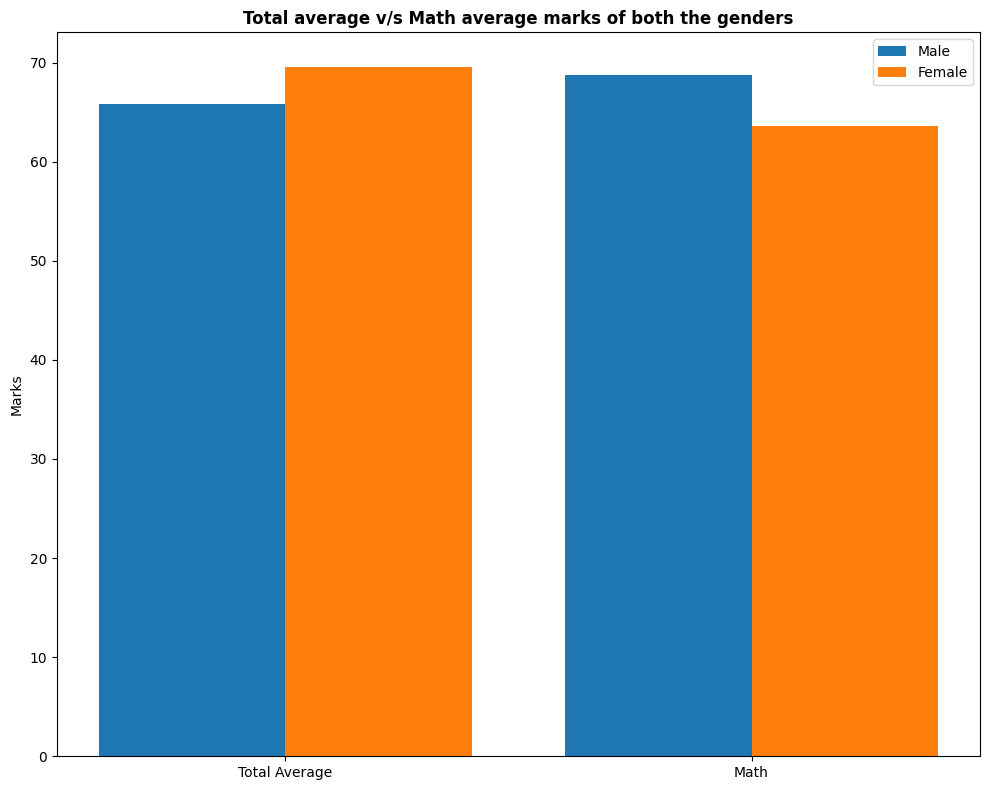

In [107]:
plt.figure(figsize=(10,8))

male_bar_length = [gender_group["average"]['male'], gender_group["math_score"]['male']]
female_bar_length = [gender_group["average"]['female'], gender_group["math_score"]['female']]

# male-->total average + male-->math avaerage
plt.bar(x=[0,1],height=male_bar_length, width=0.4, label='Male')
# female-->total average + female-->math avaerage
plt.bar(x=[0.4, 1.4],height=female_bar_length, width=0.4, label='Female')

plt.xticks([0.2,1.2], ['Total Average', 'Math'])
plt.ylabel('Marks')
plt.legend()
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.tight_layout()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

### 1) Race/Ehnicity Column (UNIVARIATE ANALYSIS) 
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

In [108]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


In [109]:
df.race_ethnicity.unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
Index(['group C', 'group D', 'group B', 'group E', 'group A'], dtype='object', name='race_ethnicity')


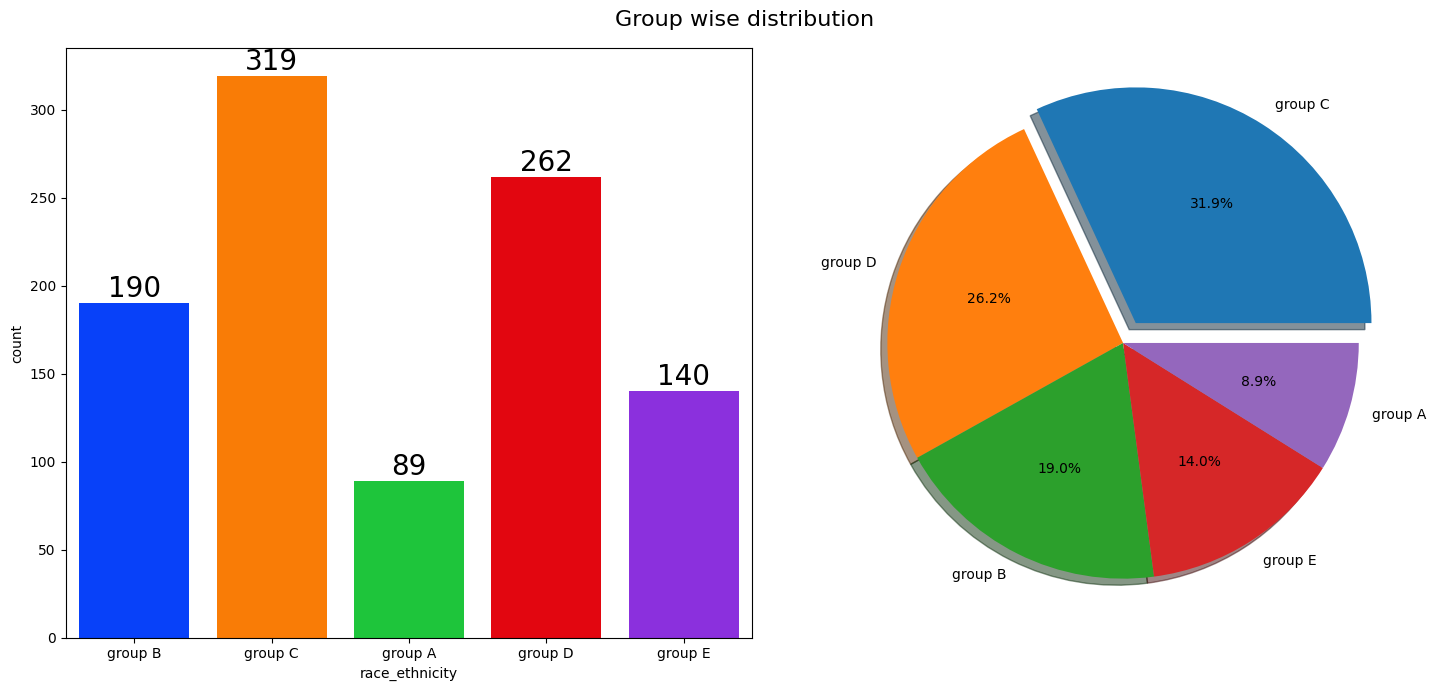

In [131]:
f,ax = plt.subplots(1,2,figsize=(15,7))

plt.subplot(121)
sns.countplot(data=df, x= df['race_ethnicity'], palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)


plt.subplot(122)
size = df['race_ethnicity'].value_counts()
print(size)
labels = df['race_ethnicity'].value_counts().index
print(labels)
plt.pie(x = size , labels=labels, autopct='%1.1f%%', explode=[0.1,0,0,0,0], shadow=True)

plt.suptitle("Group wise distribution", fontsize=16)
plt.tight_layout()
plt.show()

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

### 2) Race/Ehnicity Column (BIVARIATE ANALYSIS) 
- Is Race/Ehnicity has any impact on student's performance for each subject?

                math_score  reading_score  writing_score  total_score  \
race_ethnicity                                                          
group A          61.629213      64.674157      62.674157   188.977528   
group B          63.452632      67.352632      65.600000   196.405263   
group C          64.463950      69.103448      67.827586   201.394984   
group D          67.362595      70.030534      70.145038   207.538168   
group E          73.821429      73.028571      71.407143   218.257143   

                  average  
race_ethnicity             
group A         62.992509  
group B         65.468421  
group C         67.131661  
group D         69.179389  
group E         72.752381  


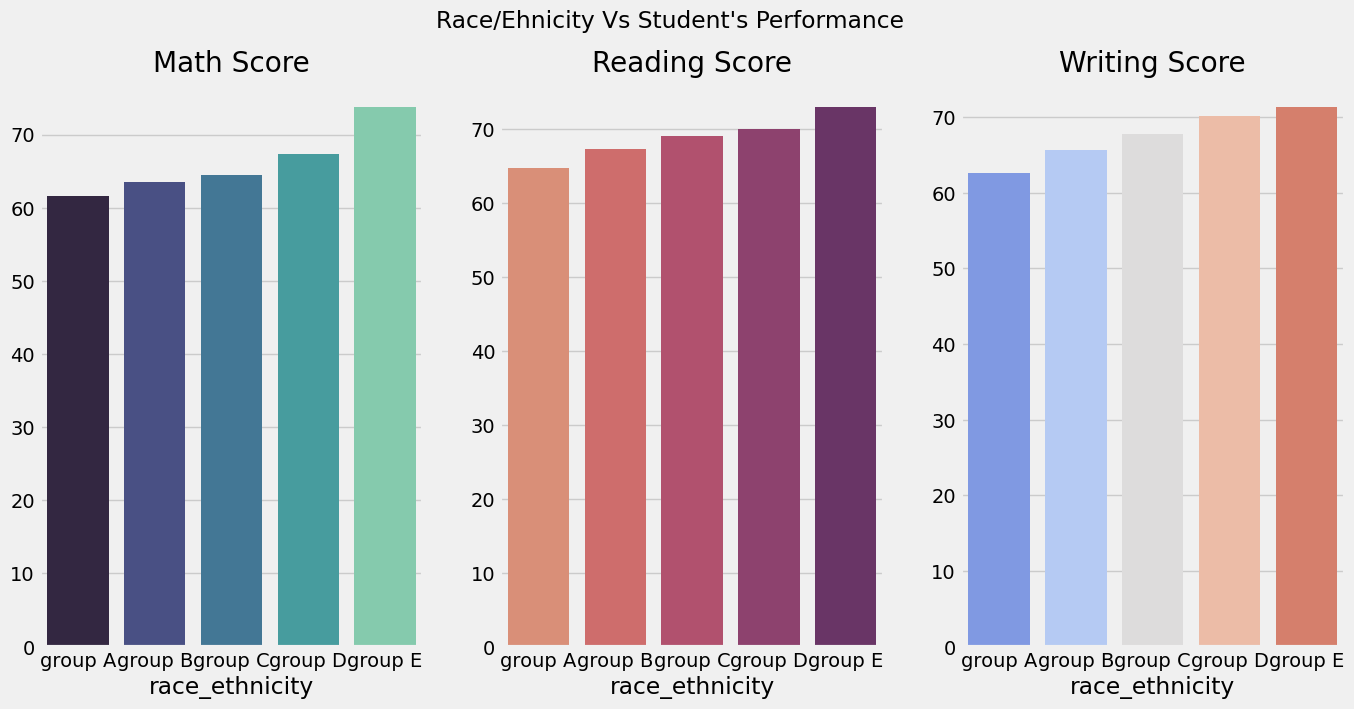

In [186]:
f,ax = plt.subplots(1,3, figsize=(15,7))

re_groups = df.groupby("race_ethnicity").mean(numeric_only=True)
print(re_groups)

plt.subplot(131)
sns.barplot(x=re_groups['math_score'].index,y=re_groups['math_score'].values, palette='mako')
plt.title("Math Score")

plt.subplot(132)
sns.barplot(x=re_groups['reading_score'].index, y=re_groups['reading_score'].values, palette='flare')
plt.title("Reading Score")

plt.subplot(133)
sns.barplot(x=re_groups['writing_score'].index, y=re_groups['writing_score'].values, palette='coolwarm')
plt.title("Writing Score")

plt.suptitle('''Race/Ehnicity Vs Student's Performance''')
plt.show()

In [182]:
re_groups.columns

Index(['math_score', 'reading_score', 'writing_score', 'total_score',
       'average'],
      dtype='object')

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

### 1)Parental education COLUMN (UNIVARIATE ANALYSIS)
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

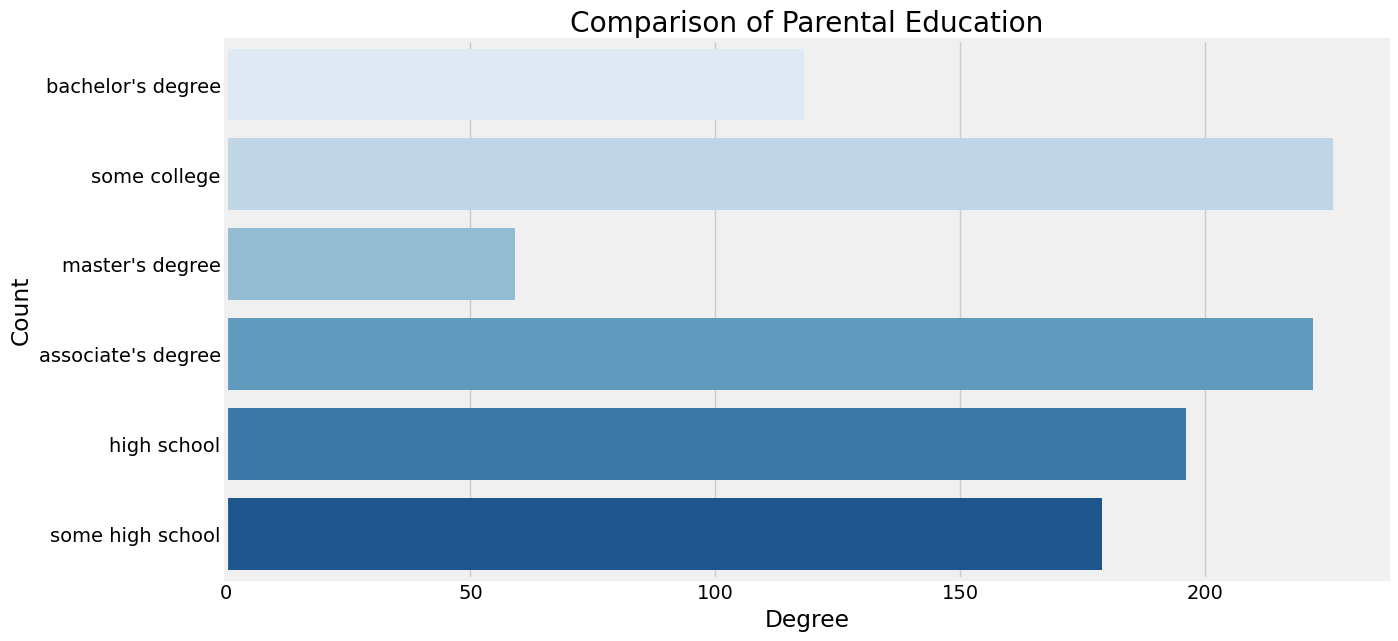

In [185]:
plt.figure(figsize=(15,7))
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Comparison of Parental Education')
plt.show()



#### Insights 
- Largest number of parents are from some college.

### 2)Parental education COLUMN (BIVARIATE ANALYSIS)

### 1) Lunch Column (UNIVARIATE ANALYSIS) 

### 2) Lunch Column (biVARIATE ANALYSIS) 
- (  Is lunch type intake has any impact on student's performance ? )

### 1) TEST PREPARATION COURSE COLUMN (BIVARIATE ANALYSIS)
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

# 4.5 CHECKING OUTLIERS

In [187]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


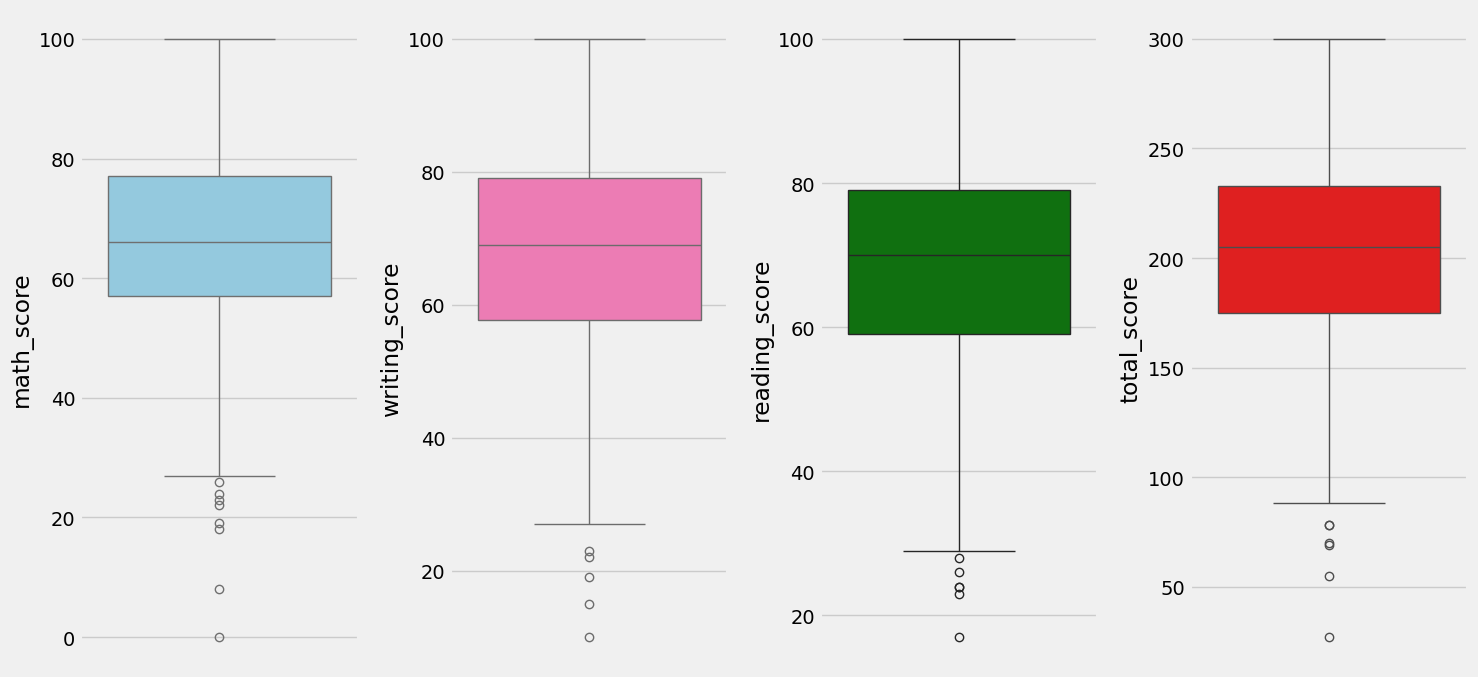

In [191]:
plt.subplots(1,4, figsize=(15,7))

plt.subplot(141)
sns.boxplot(df['math_score'], color='skyblue')

plt.subplot(142)
sns.boxplot(df['writing_score'], color='hotpink')

plt.subplot(143)
sns.boxplot(df['reading_score'], color='green')

plt.subplot(144)
sns.boxplot(df['total_score'], color='red')

plt.tight_layout()
plt.show()


# 4.6) MULTIVARIATE ANALYSIS using pairplot

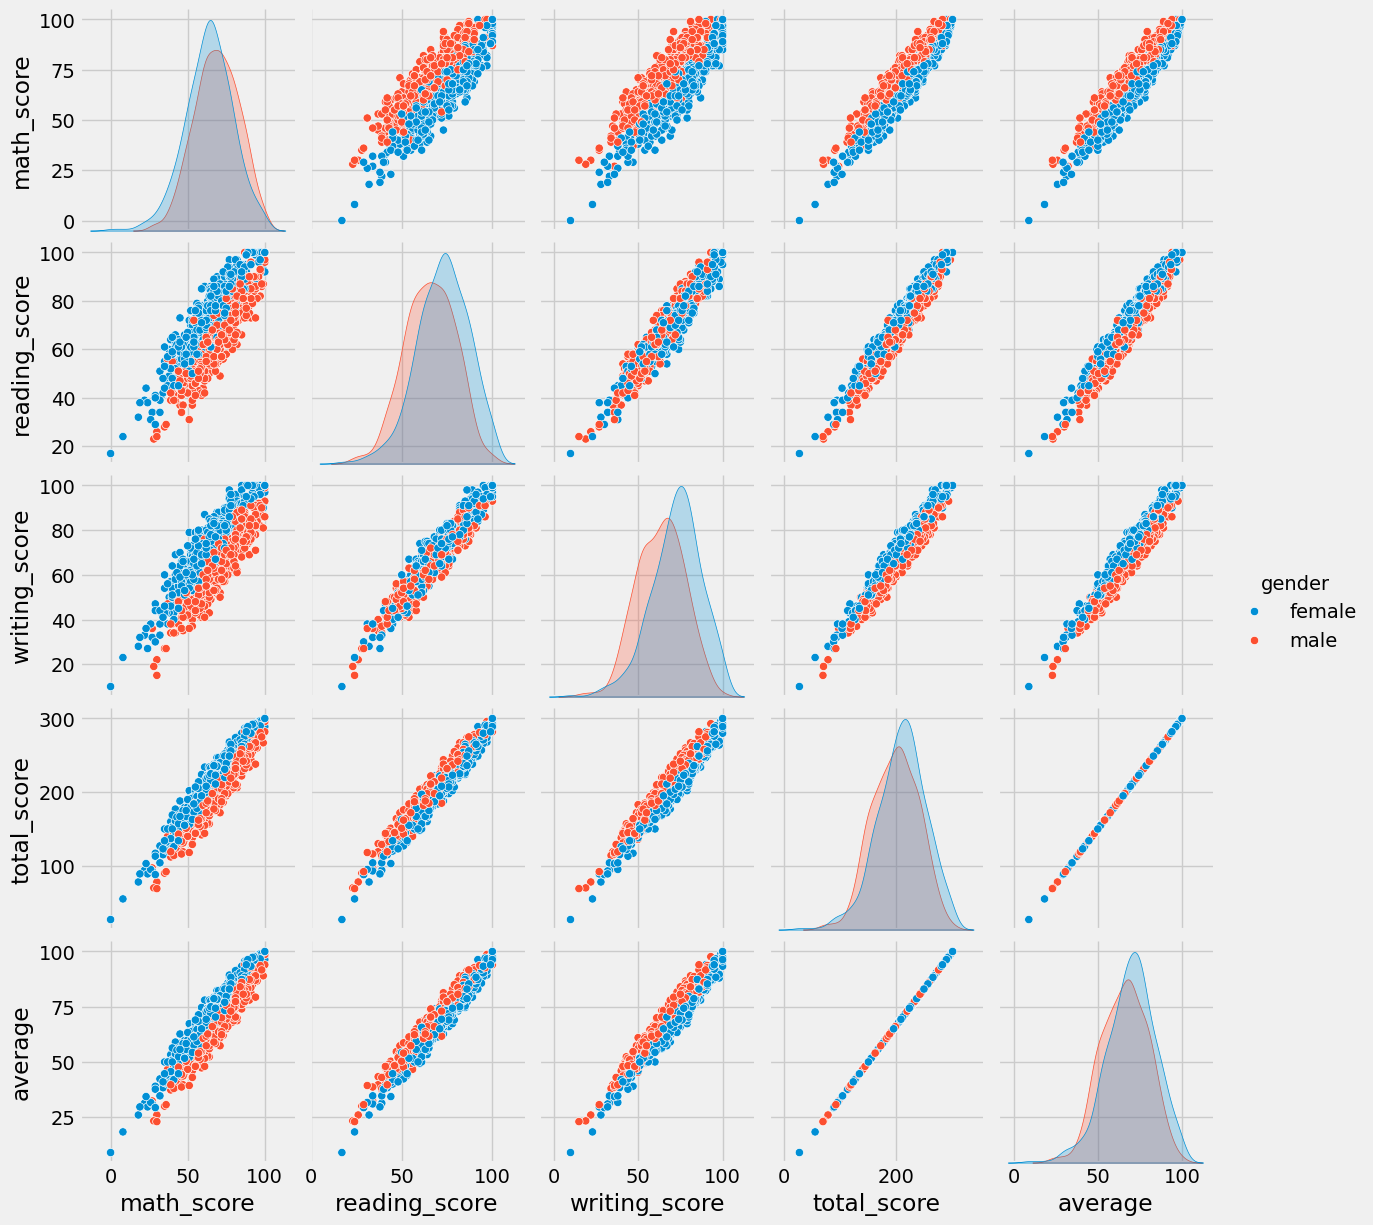

In [192]:
sns.pairplot(df,hue = 'gender')
plt.show()

In [ ]:
# plt.bar(x=[0,1],height=male_bar_length) and sns.barplot(x,y)

# sns.histplot()
# sns.countplot(x, data, palette) 
# sns.violinplot()
# sns.boxplot() --> univariate
# sns.pairplot() --> multivariate analy

# plt.pie(size, color, label)